In [51]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import display,HTML

In [52]:
#creating dataframe
crime_df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

In [53]:
# Display the first 5 rows of the crime_df
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


### Data Cleaning

In [54]:
# Identify and display all duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
print("Duplicate Rows Across All Columns:")
print(duplicate_rows)

Duplicate Rows Across All Columns:
Empty DataFrame
Columns: [DR_NO, Date Rptd, DATE OCC, TIME OCC, AREA, AREA NAME, Rpt Dist No, Part 1-2, Crm Cd, Crm Cd Desc, Mocodes, Vict Age, Vict Sex, Vict Descent, Premis Cd, Premis Desc, Weapon Used Cd, Weapon Desc, Status, Status Desc, Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4, LOCATION, Cross Street, LAT, LON, Date Rptd in words, year_rptd, day_rptd, month_rptd, hour_rptd, Date occured in words, year_occ, day_occ, month_occ, hour_occ]
Index: []

[0 rows x 38 columns]


In [55]:
# Checking for missing values in each column of the crime_df DataFrame
crime_df.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           103261
Vict Age               0
Vict Sex           98230
Vict Descent       98236
Premis Cd              9
Premis Desc          435
Weapon Used Cd    491439
Weapon Desc       491439
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          697204
Crm Cd 3          751044
Crm Cd 4          752855
LOCATION               0
Cross Street      631859
LAT                    0
LON                    0
dtype: int64

In [56]:
# Retrieving and displaying a summary of the crime_df DataFrame
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752911 entries, 0 to 752910
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           752911 non-null  int64  
 1   Date Rptd       752911 non-null  object 
 2   DATE OCC        752911 non-null  object 
 3   TIME OCC        752911 non-null  int64  
 4   AREA            752911 non-null  int64  
 5   AREA NAME       752911 non-null  object 
 6   Rpt Dist No     752911 non-null  int64  
 7   Part 1-2        752911 non-null  int64  
 8   Crm Cd          752911 non-null  int64  
 9   Crm Cd Desc     752911 non-null  object 
 10  Mocodes         649650 non-null  object 
 11  Vict Age        752911 non-null  int64  
 12  Vict Sex        654681 non-null  object 
 13  Vict Descent    654675 non-null  object 
 14  Premis Cd       752902 non-null  float64
 15  Premis Desc     752476 non-null  object 
 16  Weapon Used Cd  261472 non-null  float64
 17  Weapon Des

In [57]:
#convert "date rptd, date occ, time occ" columns to datetime objects
crime_df['Date Rptd'] = pd.to_datetime(crime_df['Date Rptd'], format= '%m/%d/%Y %I:%M:%S %p')

In [58]:
#convert "date rptd, date occ, time occ" columns to datetime objects
crime_df['Date Rptd in words'] = crime_df['Date Rptd'].dt.strftime('%A, %d %B %Y')

In [59]:
#extracting day, month, year and time into different column
crime_df['year_rptd'] = crime_df['Date Rptd'].dt.year
crime_df['day_rptd'] = crime_df['Date Rptd'].dt.strftime('%A')
crime_df['month_rptd'] = crime_df['Date Rptd'].dt.strftime('%B')
crime_df['hour_rptd'] = crime_df['Date Rptd'].dt.hour

In [60]:
# Selecting and displaying 5 random rows
crime_df.sample(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Rptd in words,year_rptd,day_rptd,month_rptd,hour_rptd
170531,201607136,2020-03-14,03/14/2020 12:00:00 AM,2300,16,Foothill,1621,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,NaN,10500 LAUREL CANYON BL,NaN,34.2610,-118.4344,"Saturday, 14 March 2020",2020,Saturday,March,0
679120,231010214,2023-06-11,06/06/2023 12:00:00 AM,1200,10,West Valley,1008,1,330,BURGLARY FROM VEHICLE,...,NaN,16900 ROSCOE BL,NaN,34.2212,-118.5011,"Sunday, 11 June 2023",2023,Sunday,June,0
557672,220817507,2022-11-30,11/29/2022 12:00:00 AM,1700,8,West LA,858,1,510,VEHICLE - STOLEN,...,NaN,1100 S CLARK DR,NaN,34.0571,-118.3847,"Wednesday, 30 November 2022",2022,Wednesday,November,0
208580,211714479,2021-10-20,10/13/2021 12:00:00 AM,2359,17,Devonshire,1768,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,NaN,9500 BIANCA AV,NaN,34.2431,-118.5143,"Wednesday, 20 October 2021",2021,Wednesday,October,0
481322,221817622,2022-09-19,09/19/2022 12:00:00 AM,800,18,Southeast,1851,2,888,TRESPASSING,...,NaN,700 W 134TH ST,NaN,33.9102,-118.2872,"Monday, 19 September 2022",2022,Monday,September,0


In [61]:
crime_df['DATE OCC'] = pd.to_datetime(crime_df['DATE OCC'], format = '%m/%d/%Y %I:%M:%S %p')

In [62]:
#convert "date rptd, date occ, time occ" columns to datetime objects
crime_df['Date occured in words'] = crime_df['DATE OCC'].dt.strftime('%A, %d %B %Y')

In [63]:
#extracting day, month, year and time into different column
crime_df['year_occ'] = crime_df['DATE OCC'].dt.year
crime_df['day_occ'] = crime_df['DATE OCC'].dt.strftime('%A')
crime_df['month_occ'] = crime_df['DATE OCC'].dt.strftime('%B')
crime_df['hour_occ'] = crime_df['DATE OCC'].dt.hour

In [64]:
crime_df= crime_df[crime_df['TIME OCC'] >9]

In [65]:
#coverting the 'time occ' column
crime_df['TIME OCC'] = crime_df['TIME OCC'].astype(str).apply(lambda x: f"{x[:-2]}:{x[-2:]}")

crime_df['TIME OCC']

0         22:30
1          3:30
2         12:00
3         17:30
4          4:15
          ...  
752906    11:00
752907    18:00
752908    10:00
752909    16:30
752910     9:00
Name: TIME OCC, Length: 736358, dtype: object

In [66]:
def add_zeros_to_dataframe_column(df, column_name):
    """
    Adds '00' at the beginning of rows in a specific column that start with ':'.

    Args:
        df (pd.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column to process.

    Returns:
        pd.DataFrame: A new DataFrame with modified rows.
    """
    df[column_name] = df[column_name].apply(
        lambda x: "00" + x if isinstance(x, str) and x.startswith(":") else x
    )
    return df

In [67]:
# Modify the DataFrame
df = add_zeros_to_dataframe_column(crime_df, "TIME OCC")

In [68]:
# Converting the 'TIME OCC' column in the crime_df DataFrame to datetime format
crime_df['TIME OCC'] = pd.to_datetime(crime_df['TIME OCC'], format = '%H:%M')

In [69]:
# Converting the 'TIME OCC' column in the crime_df DataFrame to datetime format
crime_df['hour_occ'] = crime_df['TIME OCC'].dt.strftime('%H')

In [70]:
#checking "vict sex" column
df["LON"].isnull().sum()

0

### Cleaning the 'Vict Sex' column

In [71]:
#checking "vict sex" column
df["Vict Sex"].unique()

array(['F', 'M', 'X', nan, 'H', '-'], dtype=object)

In [72]:
#cleaning the 'Vict Sex'column
df = df[~df['Vict Sex'].isin(['H','-'])]

df['Vict Sex'].value_counts()

Vict Sex
M    305740
F    270910
X     63149
Name: count, dtype: int64

In [73]:
#cropping the null values in the 'VIct Sex' column
df['Vict Sex'].dropna()

0         F
1         M
2         X
3         F
4         X
         ..
752906    M
752907    M
752908    F
752909    M
752910    F
Name: Vict Sex, Length: 639799, dtype: object

### Cleaning the 'Vict Age' column

In [74]:
#checking "vict Age" column
df['Vict Age'].value_counts()

Vict Age
 0      180355
 30      16842
 35      16551
 31      16144
 29      16132
         ...  
 97         57
 98         55
-1          42
-2           8
 120         1
Name: count, Length: 102, dtype: int64

In [75]:
#removing ages lesser than zero and greater than 120
df = df[(df['Vict Age'] >= 0) & (df['Vict Age'] <= 120) ]
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Date Rptd in words,year_rptd,day_rptd,month_rptd,hour_rptd,Date occured in words,year_occ,day_occ,month_occ,hour_occ
0,10304468,2020-01-08,2020-01-08,1900-01-01 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,"Wednesday, 08 January 2020",2020,Wednesday,January,0,"Wednesday, 08 January 2020",2020,Wednesday,January,22
1,190101086,2020-01-02,2020-01-01,1900-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,"Thursday, 02 January 2020",2020,Thursday,January,0,"Wednesday, 01 January 2020",2020,Wednesday,January,03
2,200110444,2020-04-14,2020-02-13,1900-01-01 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,"Tuesday, 14 April 2020",2020,Tuesday,April,0,"Thursday, 13 February 2020",2020,Thursday,February,12
3,191501505,2020-01-01,2020-01-01,1900-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,"Wednesday, 01 January 2020",2020,Wednesday,January,0,"Wednesday, 01 January 2020",2020,Wednesday,January,17
4,191921269,2020-01-01,2020-01-01,1900-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,"Wednesday, 01 January 2020",2020,Wednesday,January,0,"Wednesday, 01 January 2020",2020,Wednesday,January,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752906,231510379,2023-05-29,2023-05-25,1900-01-01 11:00:00,15,N Hollywood,1548,2,662,"BUNCO, GRAND THEFT",...,"Monday, 29 May 2023",2023,Monday,May,0,"Thursday, 25 May 2023",2023,Thursday,May,11
752907,231604807,2023-01-27,2023-01-26,1900-01-01 18:00:00,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,"Friday, 27 January 2023",2023,Friday,January,0,"Thursday, 26 January 2023",2023,Thursday,January,18
752908,231606525,2023-03-22,2023-03-22,1900-01-01 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,"Wednesday, 22 March 2023",2023,Wednesday,March,0,"Wednesday, 22 March 2023",2023,Wednesday,March,10
752909,231210064,2023-04-12,2023-04-12,1900-01-01 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,"Wednesday, 12 April 2023",2023,Wednesday,April,0,"Wednesday, 12 April 2023",2023,Wednesday,April,16


### Cleaning Location Column

In [76]:
df['LOCATION'].value_counts()

LOCATION
800 N  ALAMEDA                      ST      1374
7TH                                         1217
6TH                          ST             1213
7TH                          ST             1181
10200    SANTA MONICA                 BL    1146
                                            ... 
4500    WILLOWBROOK                  AV        1
6900    WHITAKER                     AV        1
3400    GLORIETTA                    PL        1
2200    CYPRESS                      AV        1
6400 N  FIGUEROAA                    ST        1
Name: count, Length: 62172, dtype: int64

In [77]:
### cleaning the space in the values
# Replace multiple spaces with a single space
df['LOCATION'] = df['LOCATION'].str.replace(r'\s+', ' ', regex=True)
df['LOCATION'].value_counts()

LOCATION
800 N ALAMEDA ST         1374
7TH                      1217
6TH ST                   1213
7TH ST                   1181
10200 SANTA MONICA BL    1146
                         ... 
2300 DUXBURY CIRC           1
11200 DONA PEGITA DR        1
3000 GARNETT ST             1
7000 HIGHLAND AV            1
6400 N FIGUEROAA ST         1
Name: count, Length: 62089, dtype: int64

# Exploratory Data Analysis

### 1. Frequency of crimes accross the years

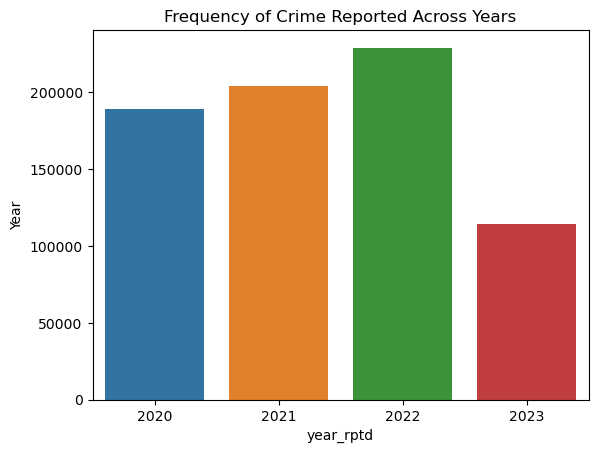

In [78]:
# Creating a count plot to visualize the frequency of crimes reported across years 
sns.countplot(x='year_rptd', data = df).set(title='Frequency of Crime Reported Across Years')

# Setting the label for the y-axis to 'Year'
plt.ylabel('Year')

# Display the plot
plt.show()

### 2. Crimes occurence accross various times of the day

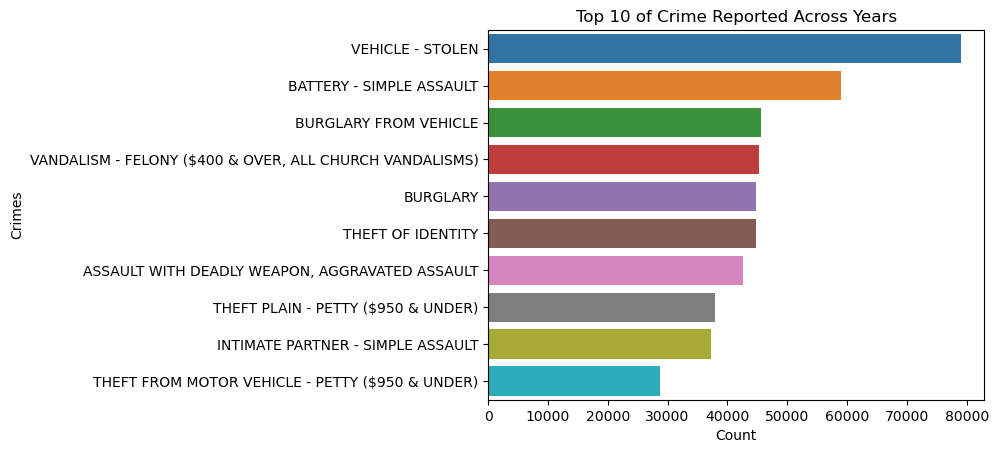

In [79]:
# Getting the top 10 most frequent crimes by counting occurrences
top_10_crimes =df['Crm Cd Desc'].value_counts().head(10)

#Creating a horizontal bar plot to visualize the top 10 most reported crimes across years
sns.barplot(x=top_10_crimes.values, y=top_10_crimes.index).set(title='Top 10 of Crime Reported Across Years')

#setting the axis
plt.ylabel('Crimes')
plt.xlabel('Count')

#show plot
plt.show()

### Common Weapon Used

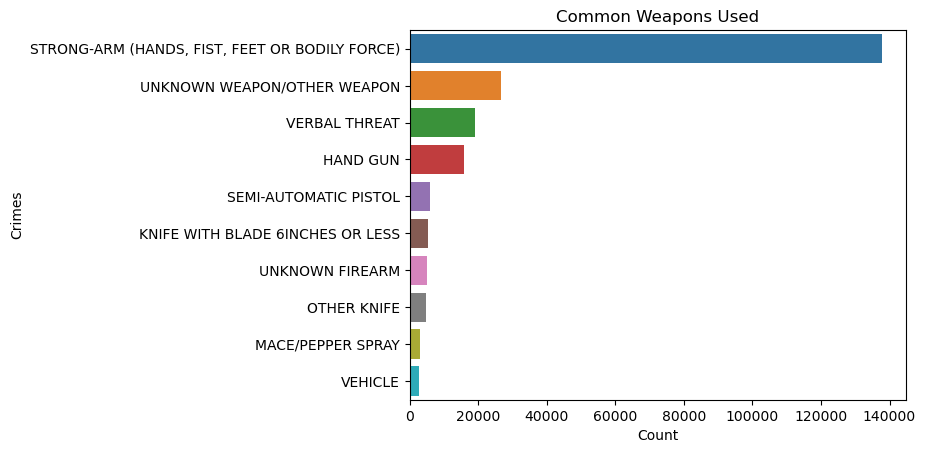

In [80]:
#common_weapon =df['Weapon Desc'].value_counts()
common_weapon =df['Weapon Desc'].value_counts().head(10)

# Creating a bar plot to visualize the most common weapons used by displaying the values and indices of the 'common_weapon' data
sns.barplot(x=common_weapon.values, y=common_weapon.index).set(title='Common Weapons Used')

#setting the axis
plt.ylabel('Crimes')
plt.xlabel('Count')

#Display plot
plt.show()

### 3. Least Crimes Reported

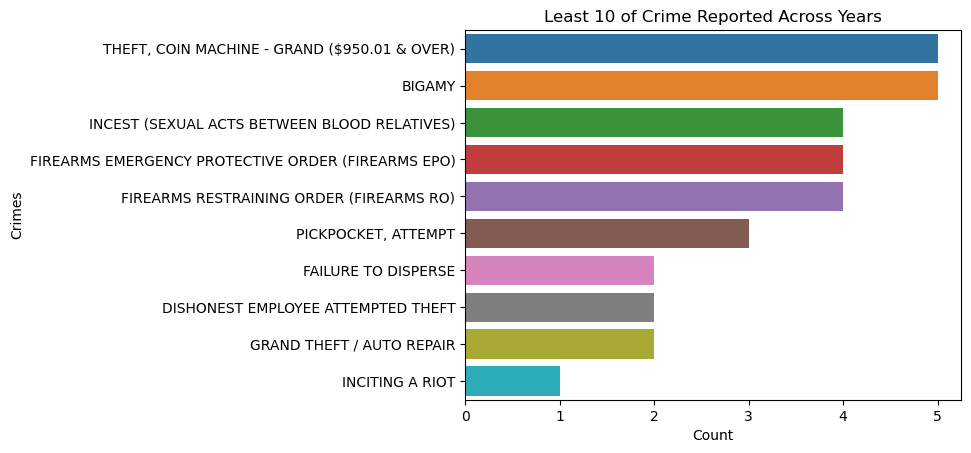

In [81]:
# Getting the least 10 most frequent crimes by counting occurrences
last_10_crimes =df['Crm Cd Desc'].value_counts().tail(10)

# Creating a horizontal bar plot to visualize the least 10 most reported crimes across years
sns.barplot(x=last_10_crimes.values, y=last_10_crimes.index).set(title='Least 10 of Crime Reported Across Years')

#setting axis
plt.ylabel('Crimes')
plt.xlabel('Count')

#Display plot
plt.show()

### 4. Crimes occurence accross various times of the day

In [84]:
# Converting the 'hour_occ' column in the df DataFrame to an ordered categorical type
df['hour_occ'] = pd.Categorical(df['hour_occ'], ordered=True)

# Defining the specific order for the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']  # Order of the days

#Converting the 'day_occ' column in the df DataFrame to an ordered categorical type with the defined day order
df['day_occ'] = pd.Categorical(df['day_occ'], categories=day_order, ordered=True)

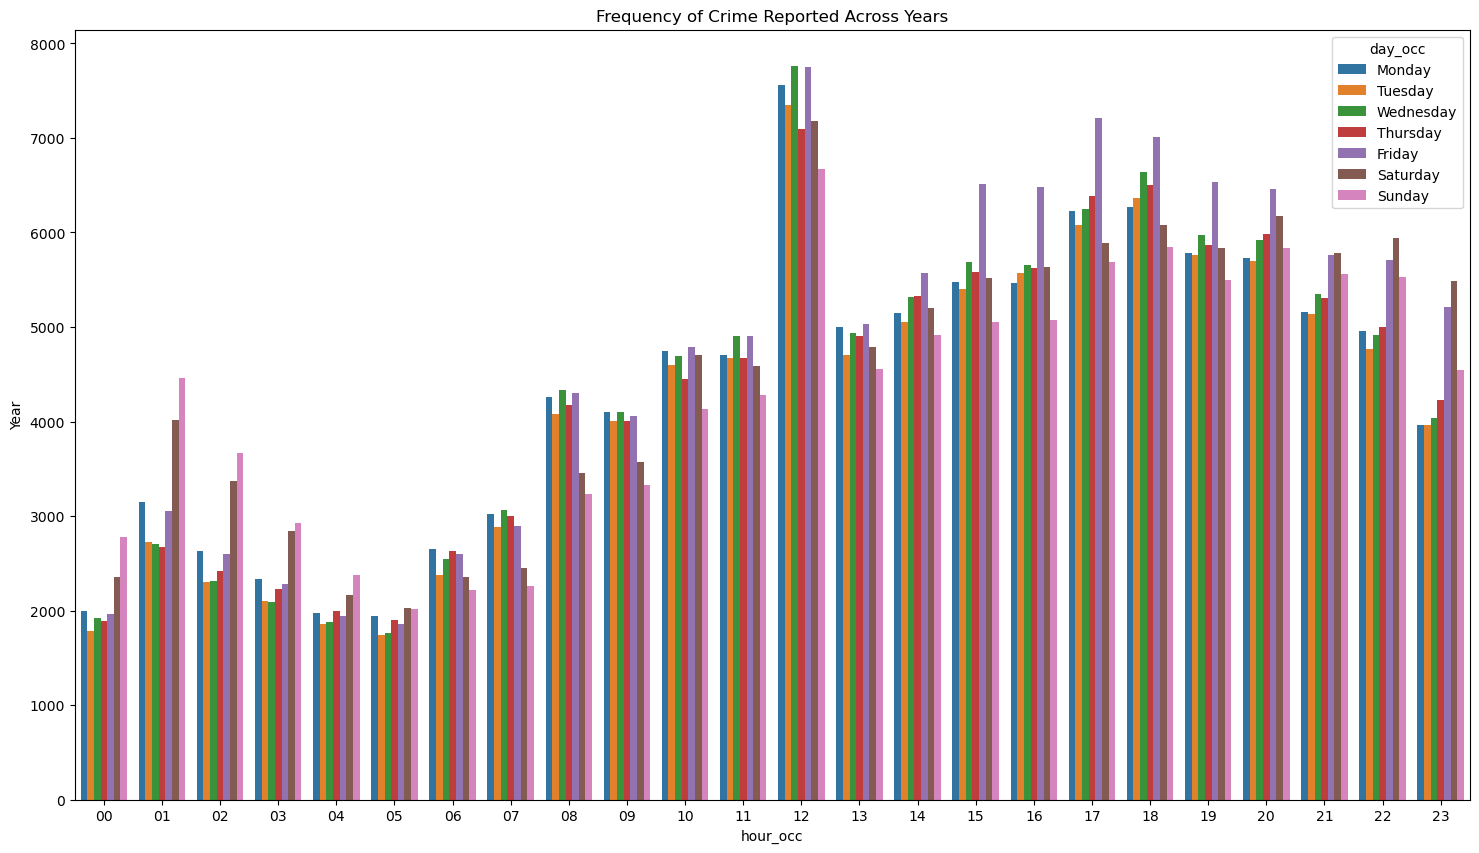

In [85]:
# Setting the figure size for the plot
plt.figure(figsize=(18,10))

#Creating a count plot to visualize the frequency of crimes reported across hours of occurrence, with different colors for each day of the week
sns.countplot(x='hour_occ', hue='day_occ', data = df).set(title='Frequency of Crime Reported Across Years')
plt.ylabel('Year')


plt.show()

### Checking Most Common Gender 

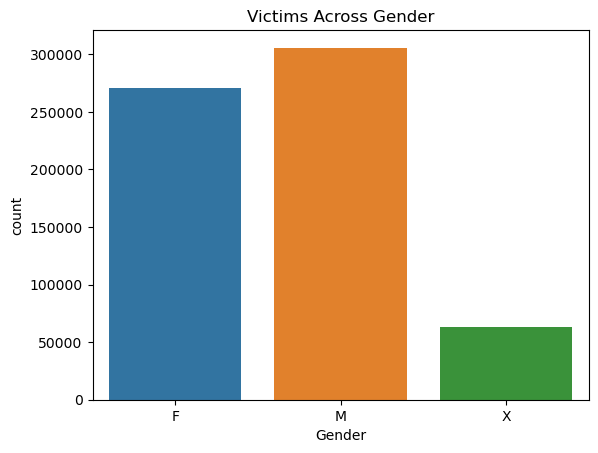

In [86]:
# Creating a count plot to visualize the distribution of victims across different genders
sns.countplot( data=df, x='Vict Sex').set(title = 'Victims Across Gender')

# Setting the label for the x-axis to 'Gender'
plt.xlabel('Gender')

plt.show()

### Visualising the distribution of Age among victims

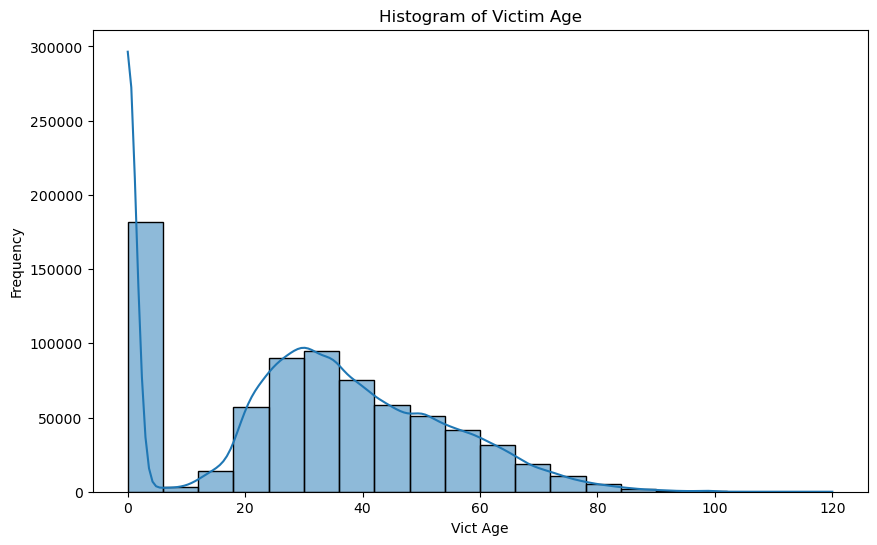

In [87]:
# Create a histogram to visualize the spread of Victim Age
plt.figure(figsize=(10, 6))

sns.histplot(df['Vict Age'], bins=20, kde=True)

# Setting the label for the x-axis to 'Vict Age'
plt.xlabel("Vict Age")
plt.ylabel("Frequency")

# Setting the title of the plot
plt.title("Histogram of Victim Age")
plt.show()

### Mapping out the crimes accross the city

In [49]:
# Create a map centered at an average location
crime_map = folium.Map(location=[df['LAT'].mean(), df['LON'].mean()], zoom_start=13)

# Add crime locations to the map
for _, row in df.iterrows():
    folium.Marker(
        location=[row['LAT'], row['LON']],
        popup=f"Crime: {row['Crm Cd Desc']}",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(crime_map)

# Save map to an HTML file or display
crime_map.save('crime_map.html')
display(HTML('crime_map.html'))

### Most Common Crime Location

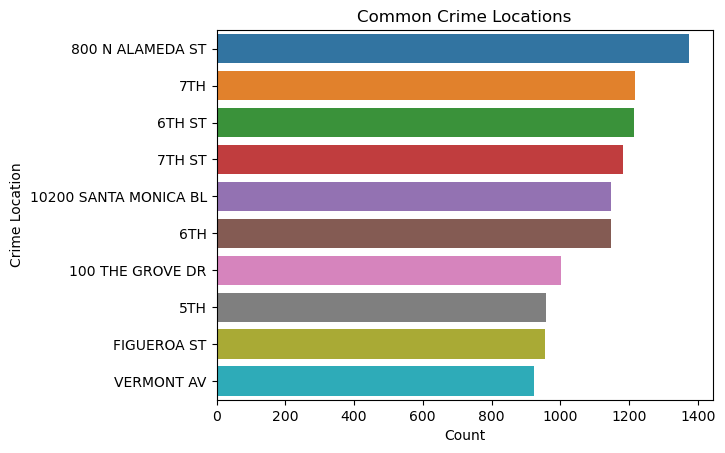

In [88]:
# Getting the top 10 most common crime locations by counting occurrences
common_location =df['LOCATION'].value_counts().head(10)

# Creating a bar plot to visualize the top 10 most common crime locations
sns.barplot(x=common_location.values, y=common_location.index).set(title='Common Crime Locations')

# Setting the label for the y-axis
plt.ylabel('Crime Location')
plt.xlabel('Count')

#Display plot
plt.show()

### Least Common Crime Location

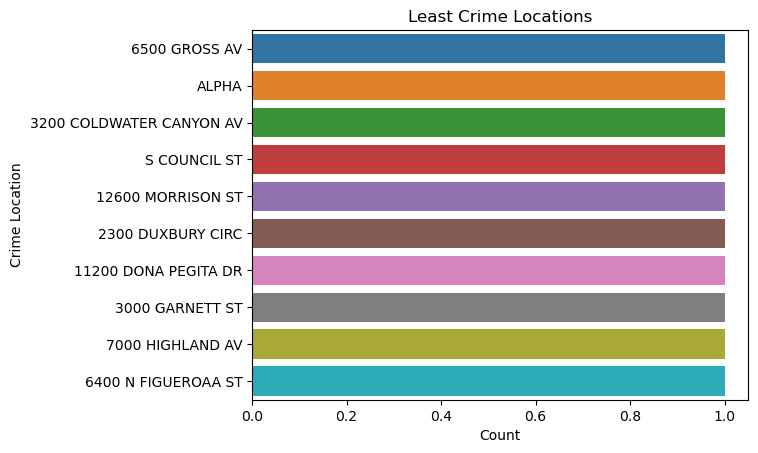

In [89]:
# Getting the least 10 most common crime locations
least_location =df['LOCATION'].value_counts().tail(10)

# Creating a bar plot to visualize the least common crime locations
sns.barplot(x=least_location.values, y=least_location.index).set(title='Least Crime Locations')

plt.ylabel('Crime Location')
plt.xlabel('Count')

#Display plot
plt.show()